# Exercises

1. The Tensorflow playground is a handy neural network simulator built by the Tensorflow team. In this exercise, you will train several binary classifiers in just a few clicks, & tweak the model's architecture & its hyperparameters to gain some intuition on how neural networks work & what their hyperparameters do. Take some time to explore the following:
   a. The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.
   b. Activation functions. Try replacing the tanh activation with a ReLU activation function, & train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.
   c. The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, & sometimes it even gets stuck in a local minimum.
   d. What happens when neural nets are too small? Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters & systematically underfits the training set.
   e. What happens when neural nets are large enough? Set the number of neurons to eight, & train the network several times. Notice that it is now consistently fast & never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, & even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.
   f. The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under "DATA"), & change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer & often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than neurons in the lowest layers (on the left). This problem, called the "vanishing gradients" problem, can be alleviated with better weight initialisation & other techniques, better optimisers (such as AdaGrad or Adam), or batch normalisation.
   g. Go further. Take an hour or so to play around with other parameters & get a feel for what they do, to build an intuitive understanding about neural networks.
2. Draw an ANN using the original artificial neurons that computes $A \oplus B$ (where $\oplus$ represents the XOR operation). Hint: $A \oplus B = (A \land \neg B) \lor (\neg A \land B)$.
3. Why is it generally preferrable to use a logistic regression classifier rather than a classical perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?
4. Why was the logistic activation function a key ingredient in training the first MLPs?
5. Name three popular activation functions. Can you draw them?
6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, & finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.
   * What is the shape of the input matrix $X$?
   * What are the shapes of the hidden layer's weight vector $W_j$ & its bias vector $b_h$?
   * What are the shapes of the output layer's weight vector $W_o$ & its bias vector $b_o$?
   * What is the shape of the network's output matrix $Y$?
   * Write the equation that computes the network's output matrix $Y$ as a function of $X$, $W_h$, $b_h$, $W_o$, & $b_o$.
7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, & which activation function should you use? What about for getting your network to predict housing prices?
8. What is backpropagation & how does it work? What is the difference between backpropagation & reverse-mode autodiff?
9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?
10. Train a deep MLP on the MNIST dataset (you can load it using the `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, & finding the point where the loss shoots up). Try adding all the bells & whistles -- save checkpoints, use early stopping, & plot learning curves using Tensorboard.

---

1. [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.27089&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
2. <img src = "Images/Xor Operation.png" width = "600" style = "margin:auto"/>
3. Perceptrons do not output a class probability; they make predictions based on a hard threshold, unlike logistic regression classifiers, which output class probabilities. Also, perceptrons can only converge to a solution if the training instances are linearly separable (*perceptron convergence theorem*). You can make a perceptron equivalent to a logistic regression classifier by changing the activation function to the  logistic activation function (softmax activation function for multiple outputs). Then you train it with gradient descent, similar to logistic regression.
4. It's derivative is never zero, the MLP could always converge to a solution.
5. <img src = "Images/Activation Functions & Their Derivatives.png" widht = "600" style = "margin:auto"/>
6. The input matrix has 10 input neurons, so its size would be 10 rows x $m$ columns, where $m$ is the mini-batch size (# of instances). The shape of the hidden layer's weight vector $W_j$ & its bias vector $b_h$ is (10, 50) & 50, respectively. The shape of the outputer layer's weight vector $W_o$ & its bias vector $b_o$ is (50, 3) & 3, respectively. The shape of the network's output matrix $Y$ is 3 * $m$; once again, $m$ is the mini-batch size.
7. The equation is $\phi((\phi(XW_h + b_h))W_o + b_o)$ where $\phi$ is ReLU activation function.
8. Backpropagation is a technique used to find out each connection weight & each bias term in a neural network with regard to every single model parameter. It handles one mini-batch at a time & goes through the full training set multiple times. Each mini-batch is passed through the network's input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this hidden layer for each instance in the mini-batch, & the output is passed on to the next layer. This process is repeaeted until we get the output of the last layer, the output layer. This is the *forward pass*; it is exactly like making a prediction, but the intermediate results are preserved for the *backward pass*. The algorithm then measure the network's output error using a loss function that compares the desired output & the actual output of the network, returning some measure of the error. Then it computes how much each output connection contributed to the error. The algorithm then computes how much of these error contributions came from the connection in the layer below, & so on, until it reaches the first hidden layer. Finally, the algorithm performs gradient descent to tweak all the connection weights in the network using the error gradients it computed. Reverse-mode auto diff performs forward pass through a network & then performs a reverse pass, computing the error gradients. In essence, backpropagation is the entire process of training a neural network using backpropagation steps, computing the error gradient & performing gradient descent on each mini-batch, until its gone through the training set multiple times. Reverse-mode auto diff is the technique of computing the gradients efficiently, which backpropagation happens to use.
9. Number of hidden layers, number of neurons in hidden layers, learning rate, optimiser, activation function, number of training iterations. If a MLP overfits the training data, you can reduce the number hidden layers & reduce the number of neurons in your hidden layers.

# 10.

In [3]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_val, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_val, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

In [12]:
K = keras.backend

# Define a function that will capture the learning rate & loss.
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [19]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [20]:
# Start with a learning rate of 1e-3 & grow it by 0.5% at each iteration.
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ["accuracy"])
exp_lr = ExponentialLearningRate(factor = 1.005)

In [21]:
# Train the model for 1 epoch.
history = model.fit(X_train, y_train, epochs = 1,
                    validation_data = (X_val, y_val),
                    callbacks = [exp_lr])

1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.6005 - val_loss: nan - val_accuracy: 0.0958


Now we will plot the loss against learning rate.

Text(0, 0.5, 'Loss')

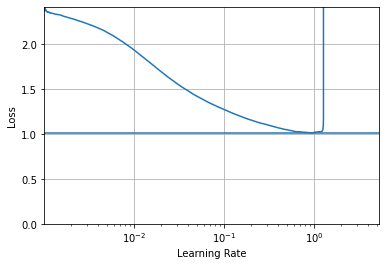

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(exp_lr.rates, exp_lr.losses)
plt.gca().set_xscale("log")
plt.hlines(min(exp_lr.losses), min(exp_lr.rates), max(exp_lr.rates))
plt.axis([min(exp_lr.rates), max(exp_lr.rates), 0, exp_lr.losses[0]])
plt.grid()
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

It seems like anything before 1 will work.

In [25]:
import numpy as np

exp_lr.rates[np.argmin(exp_lr.losses)]

1.3488259

In [30]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate = 0.1),
              metrics = ["accuracy"])

In [31]:
import os

# Increment at every run
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("mnist_exercise.h5", save_best_only = True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_val, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9194 - val_loss: 0.1349 - val_accuracy: 0.9612
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1094 - accuracy: 0.9669 - val_loss: 0.1124 - val_accuracy: 0.9682
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0811 - val_accuracy: 0.9746
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0775 - val_accuracy: 0.9774
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0713 - val_accuracy: 0.9776
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0711 - val_ac

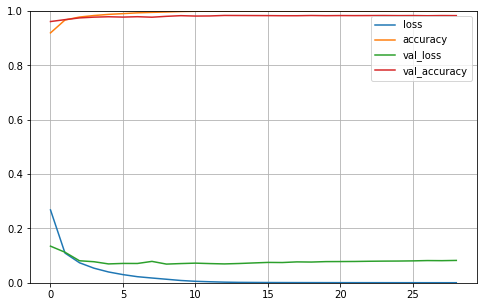

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

We'll grab our best model.

In [33]:
model = keras.models.load_model("mnist_exercise.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9804


[0.06912047415971756, 0.980400025844574]

We can look at the learning curves using TensorBoard.

In [40]:
%load_ext tensorboard
%tensorboard --logdir="/Users/jiehengyu/Desktop/ML Python/Chapter 10/my_mnist_logs" --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
